In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, LSTM, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# MNIST veri kümesini yükle
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Verileri yeniden şekillendirme
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# Verileri normalize etme
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Hedef değişkenleri kategorik hale getirme
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Model tanımlama
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# LSTM layer
model.add(Reshape((-1, 128)))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(Flatten())

# Fully connected layerlar
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
# Model derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Model eğitimi
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 11s 10ms/step - loss: 0.4391 - accuracy: 0.8658 - val_loss: 0.1299 - val_accuracy: 0.9592
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1204 - accuracy: 0.9657 - val_loss: 0.0748 - val_accuracy: 0.9767
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0837 - accuracy: 0.9765 - val_loss: 0.0532 - val_accuracy: 0.9839
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0658 - accuracy: 0.9814 - val_loss: 0.0522 - val_accuracy: 0.9846
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0541 - accuracy: 0.9843 - val_loss: 0.0478 - val_accuracy: 0.9857
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0480 - accuracy: 0.9862 - val_loss: 0.0479 - val_accuracy: 0.9858
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0483 - val_accuracy: 0.98

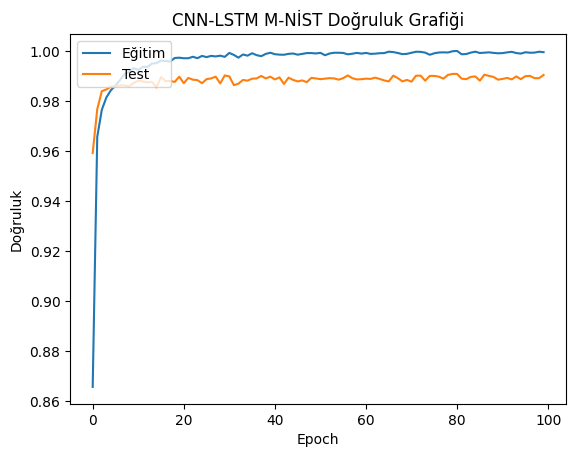

In [ ]:
# Accuracy grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN-LSTM M-NİST Doğruluk Grafiği')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

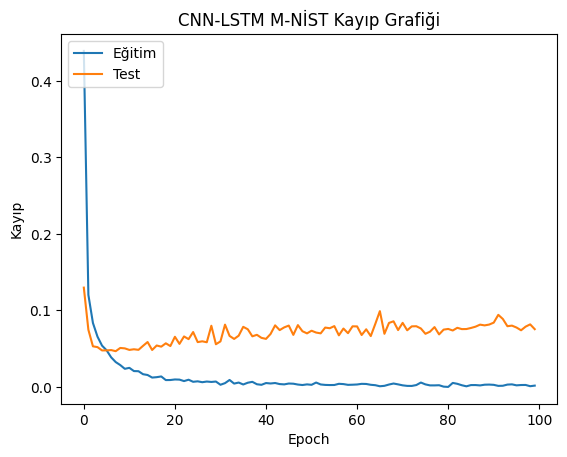

In [ ]:
# Loss grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN-LSTM M-NİST Kayıp Grafiği')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper left')
plt.show()

In [ ]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

print("Eğitim Doğruluk Değerleri:", train_accuracy)
print("Test Doğruluk Değerleri:", test_accuracy)


Eğitim Doğruluk Değerleri: [0.8657500147819519, 0.965666651725769, 0.9764500260353088, 0.9813833236694336, 0.9842833280563354, 0.9861833453178406, 0.9883333444595337, 0.9907666444778442, 0.9915666580200195, 0.9931166768074036, 0.9923833608627319, 0.9936166405677795, 0.9936166405677795, 0.9948999881744385, 0.995116651058197, 0.9961166381835938, 0.9959666728973389, 0.9957166910171509, 0.9971500039100647, 0.9972833395004272, 0.9970499873161316, 0.9970666766166687, 0.9976500272750854, 0.997083306312561, 0.9979833364486694, 0.9975166916847229, 0.9980000257492065, 0.997783362865448, 0.9980833530426025, 0.9976166486740112, 0.9991833567619324, 0.9983833432197571, 0.9972833395004272, 0.9985666871070862, 0.9980833530426025, 0.9990666508674622, 0.998283326625824, 0.9978833198547363, 0.9987833499908447, 0.9992666840553284, 0.9986666440963745, 0.9984999895095825, 0.998449981212616, 0.9988166689872742, 0.9989500045776367, 0.9984833598136902, 0.9987999796867371, 0.9991166591644287, 0.9991333484649658

In [ ]:
# Test veri kümesi üzerinde tahmin yapma
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
# Tahminleri elde etme
y_pred_probs = model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


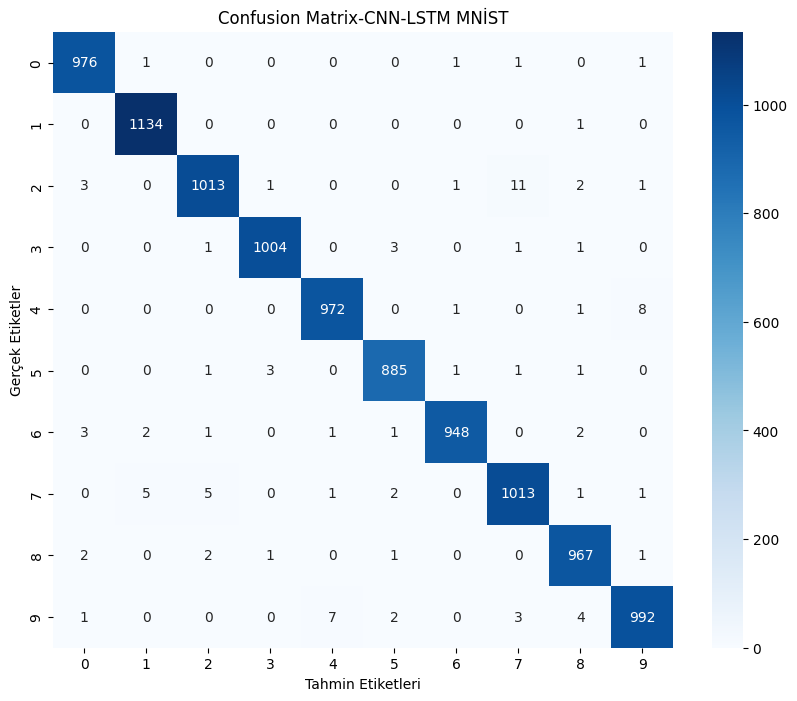

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix-CNN-LSTM MNİST')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.show()

In [ ]:
# Sınıflandırma raporu
cr = classification_report(y_true_classes, y_pred_classes)
print("Sınıflandırma Raporu:")
print(cr)

report_lines = cr.split('\n')
for line in report_lines[2:-5]:
    line_data = line.split()
    if len(line_data) >= 4:
        class_label = int(line_data[0])
        precision = float(line_data[1])
        recall = float(line_data[2])
        f1 = float(line_data[3])
        print('Sınıf:', class_label)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1-score:', f1)
        print('----------------------')


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Sınıf: 0
Precision: 0.99
Recall: 1.0
F1-score: 0.99
----------------------
Sınıf: 1
Precision: 0.99
Recall: 1.0
F1-score: 1.0
----------------------
Sınıf: 2
Precision: 0.99
Recall: 0.98
F1-score: 0.99
-----------------

In [ ]:
# ROC eğrisi ve AUC skoru hesaplama
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Mikro-ortalamalı ROC eğrisi ve AUC skoru hesaplama
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Makro-ortalamalı ROC eğrisi ve AUC skoru hesaplama
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 10
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Sonuçları yazdırma
print('Mikro-Ortalama AUC Skoru:', roc_auc_micro)
print('Makro-Ortalama AUC Skoru:', roc_auc_macro)

Mikro-Ortalama AUC Skoru: 0.9996241583333333
Makro-Ortalama AUC Skoru: 0.9995752269278749


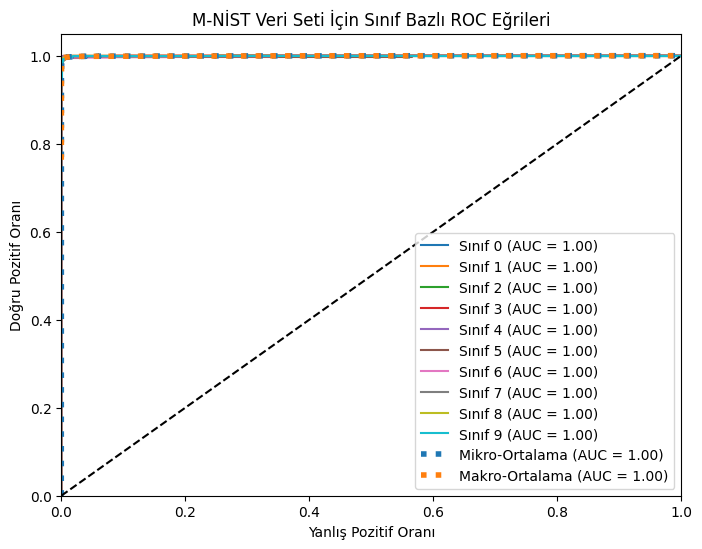

In [ ]:
# ROC eğrilerini çizme
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Sınıf %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Mikro-ortalamalı ROC eğrisini çizme
plt.plot(fpr_micro, tpr_micro, label='Mikro-Ortalama (AUC = %0.2f)' % roc_auc_micro, linestyle=':', linewidth=4)

# Makro-ortalamalı ROC eğrisini çizme
plt.plot(fpr_macro, tpr_macro, label='Makro-Ortalama (AUC = %0.2f)' % roc_auc_macro, linestyle=':', linewidth=4)

# Rastgele tahmin edilen ROC eğrisini çizme
plt.plot([0, 1], [0, 1], 'k--')

# Eksen ve başlık ayarları
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('M-NİST Veri Seti İçin Sınıf Bazlı ROC Eğrileri')
plt.legend(loc="lower right")

# Grafik gösterme
plt.show()